In [12]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import style
#style.use("gunplot")
from sklearn.cluster import KMeans
%matplotlib inline
from osgeo import gdal
from sklearn.externals import joblib
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import time as t


class MDimage(object):
    def __init__(self, filepath):
        self.filepath = filepath
        self.ds = gdal.Open(filepath, gdal.GA_ReadOnly)
        self.iminfo = dict()
        self.iminfo['bandnum'] = self.ds.RasterCount
        self.iminfo['cols'] = self.ds.RasterXSize
        self.iminfo['rows'] = self.ds.RasterYSize
        self.iminfo['originX'] = self.ds.GetGeoTransform()[0]
        self.iminfo['originY'] = self.ds.GetGeoTransform()[3]
        self.iminfo['pixelWidth'] = self.ds.GetGeoTransform()[1]
        self.iminfo['pixelHeight'] = self.ds.GetGeoTransform()[5]

class Index(MDimage):
    def __init__(self, filepath):
        self.filepath = filepath
        super(Index, self).__init__(filepath)

    def index2Array(self):
        cols = self.iminfo['cols']
        rows = self.iminfo['rows']
        band = self.ds.GetRasterBand(1)
        array = band.ReadAsArray(0, 0, cols, rows)
        array = array.reshape(cols * rows)
        return array





In [17]:
def graph(x, y):
    files = ["/home/faizan/Pakistan/EVI/2010/sindh.2010%03d"  % (i) + ".tif" for i in range(1, 363) ]
    ds = gdal.Open(files[0])
    evi = np.array([ds.ReadAsArray()[(x, y)]])
    for i in files[1:]:
        ds = gdal.Open(i)
        evi = np.vstack([evi, ds.ReadAsArray()[(x, y)]])
    #plt.plot(range(91, len(evi)+91), evi / 10000.)
    plt.plot(range(0, len(evi)), evi / 10000.)
    plt.show()

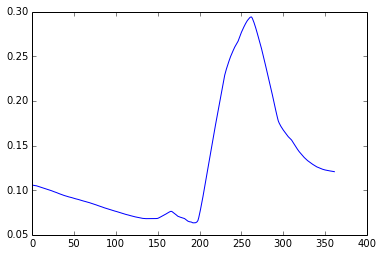

In [18]:
x, y = (687, 693)
graph(x, y)
#print max_date[x, y]

In [75]:
EVI_path= "/home/faizan/HDD1/EVI/CSV/Pak_crop_all_point_evi.csv"
data1 = pd.read_csv(EVI_path)
data = data1[data1["ID"] == 17]
dates = [datetime.datetime.strptime(str(k), "%Y%j") for k in data["DATE"]]
data.index = dates
dummy = data[data.index.year > 2008]
dummy = dummy[dummy.index.year < 2011]
time = dummy.index
evi  = dummy["EVI"]
time1=dummy["DATE"]

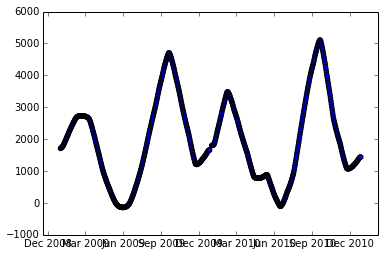

In [77]:
plt.scatter (time, evi)
plt.show()

In [46]:
time1 = time.timetuple()

AttributeError: 'DatetimeIndex' object has no attribute 'timetuple'

[[  2.00974905e+06   6.89922034e+02]
 [  2.00982469e+06   3.99706122e+03]
 [  2.00953386e+06   2.26047857e+03]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

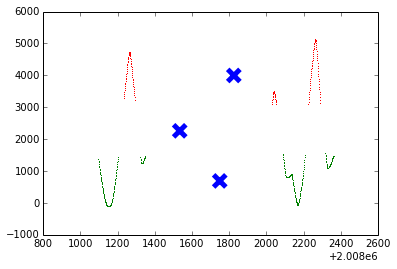

In [78]:

D=[]
for i in range(len(evi)):
    D.append([time1[i], evi[i]])


#clf= KMeans(n_clusters=3)
clf= KMeans(n_init=20,n_clusters=3)

clf.fit(D)

centroid = clf.cluster_centers_
lables= clf.labels_

print centroid 
print lables

colors = ["g,", "r,", "c", "b", "c", "g", "d", "k"]

for l in range(len(D)):
    #print("cor:", D[l], "lab:", lables[l])
    plt.plot(D[l][0], D[l][1], colors[lables[l]], markersize=10)
    
plt.scatter(centroid[:,0], centroid[:,1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()

In [59]:
C_EVI= np.cumsum(evi)

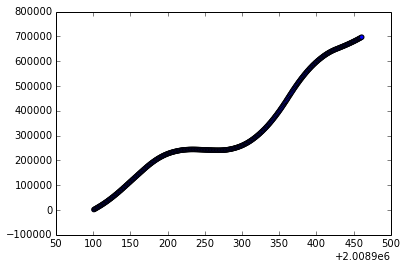

In [61]:
plt.scatter (time1, C_EVI)
plt.show()

[[ 2009033.            72453.98461538]
 [ 2009320.5          630317.24390244]
 [ 2009149.           242585.35928144]
 [ 2009256.           427378.80851064]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


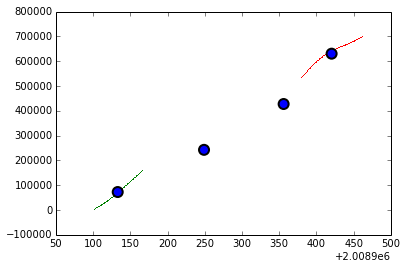

In [80]:
D=[]
for i in range(len(C_EVI)):
    D.append([time1[i], C_EVI[i]])


clf= KMeans(n_clusters=4, n_init=2)
clf.fit(D)

centroid = clf.cluster_centers_
lables= clf.labels_

print centroid 
print lables

colors = ["g,", "r,", "c", "b", "c", "g", "d", "k"]

for l in range(len(D)):
    #print("cor:", D[l], "lab:", lables[l])
    plt.plot(D[l][0], D[l][1], colors[lables[l]], markersize=10)
    
plt.scatter(centroid[:,0], centroid[:,1], marker="o", s=100, linewidths=2, zorder=10)
plt.show()

In [ ]:
year=2002   
evi="/home/faizan/Pakistan/EVI/"+str(year)+"/faislabad.%d.kharif_max_evi_value.tif" % (year)
date="/home/faizan/Pakistan/EVI/"+str(year)+"/faislabad.%d.kharif_max_evi.tif" % (year)
limage = Index(evi)
cols = limage.iminfo['cols']
rows = limage.iminfo['rows']
bandnum= limage.iminfo['bandnum']
Y = (limage.index2Array())

limage = Index(date)
X= (limage.index2Array())

plt.scatter (X,Y)
plt.show()

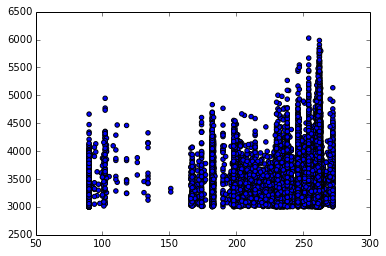

In [14]:
y=[]
x=[]
D=[]
for i in np.where(Y > 3000)[0]:
    y.append(Y[i])
    x.append(X[i])
    D.append([X[i], Y[i]])
plt.scatter (x,y)
plt.show()

[[  179.10384163  3329.400392  ]
 [  252.36822998  4209.3950157 ]]
[1 1 0 ..., 1 1 1]


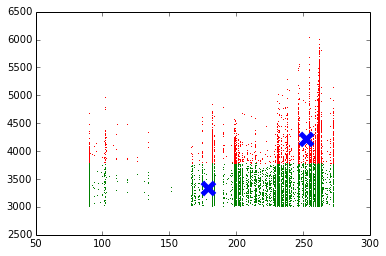

In [15]:
clf= KMeans(n_clusters=2)
clf.fit(D)

centroid = clf.cluster_centers_
lables= clf.labels_

print centroid 
print lables

colors = ["g,", "r,"]

for l in range(len(D)):
    #print("cor:", D[l], "lab:", lables[l])
    plt.plot(D[l][0], D[l][1], colors[lables[l]], markersize=10)
    
plt.scatter(centroid[:,0], centroid[:,1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()
    

In [16]:
from sklearn.cluster import MiniBatchKMeans

[[  252.87189127  4208.53658184]
 [  178.702223    3327.60009311]]
[0 0 1 ..., 0 0 0]


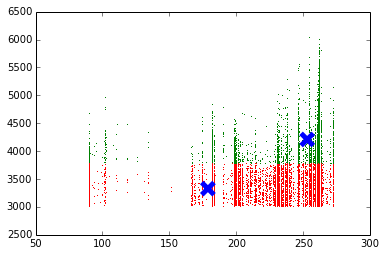

In [17]:
clf= MiniBatchKMeans(n_clusters=2)
clf.fit(D)

centroid = clf.cluster_centers_
lables= clf.labels_

print centroid 
print lables

colors = ["g,", "r,"]

for l in range(len(D)):
    #print("cor:", D[l], "lab:", lables[l])
    plt.plot(D[l][0], D[l][1], colors[lables[l]], markersize=10)
    
plt.scatter(centroid[:,0], centroid[:,1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()
    

In [9]:
from sklearn.cluster import SpectralClustering

In [11]:
clf= SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
clf.fit(D)

centroid = clf.cluster_centers_
lables= clf.labels_

print centroid 
print lables

colors = ["g,", "r,"]

for l in range(len(D)):
    #print("cor:", D[l], "lab:", lables[l])
    plt.plot(D[l][0], D[l][1], colors[lables[l]], markersize=10)
    
plt.scatter(centroid[:,0], centroid[:,1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/manifold/spectral_embedding_.py:215: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: 

In [ ]:
clf.predict([120,6000])

In [48]:
centroid

array([[   86.34083787,  3593.1126505 ],
       [   60.48093467,  5844.55068589],
       [   78.74317954,  4338.07958877],
       [   66.50186261,  5021.08096855]])

In [49]:
lables

array([3, 2, 3, ..., 1, 1, 1], dtype=int32)

In [41]:
len(lables)

58922

In [42]:
len(x)

58922